In [1]:
import pandas as pd

In [40]:
import networkx as nx

In [43]:
import matplotlib.pyplot as plt

In [97]:
file_page = "wiki-topcats-page-names.txt"
file_category = "wiki-topcats-categories.txt" 
file_graph = "wikigraph_reduced.csv"

In [9]:
path = "C:\\Users\\Alessandra\\Downloads\\"

In [29]:
graph_ds=pd.read_csv(path + file_graph, sep = '\t', names = ['id','source', 'dest'], header = 0, index_col = 'id')

In [285]:
graph_ds.isnull().sum()

source    0
dest      0
dtype: int64

In [79]:
graph_ds.head()

,source,dest
id,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


One article might belong to a single category or multiple ones. In the case of multiple appearance, you break the ties uniformly at random.

# [RQ1] Build the graph G=(V, E) and provide basic inoformation.
where V is the set of articles and E the hyperlinks among them.

#### Is the graph directed?

For answer to this question we check if all the pairs source - destination appears also as destination - source. For istance if the first row of the dataset is:

| Source      | Destination |
| ----------- | ----------- |
| 95          | 1185516     |

we test if there are also:

| Source      | Destination |
| ----------- | ----------- |
| 1185516     | 95          |

in the dataset. If this occurs for each rows we say that graph in **unidirected**, otherwise, if there is a row for which the condition does not hold we say that the graph is **directed**.

In [274]:
#read the first row
source_0 = graph_ds.iloc[0]['source']
dest_0 = graph_ds.iloc[0]['dest']
#check if source_0 is one of the destination of dest_0
if not (source_0 in list(graph_ds[graph_ds.source == dest_0]['dest'])):
    print('The graph is directed.')
else:
    print('The graph may be undirected.')

The graph is directed.


#### How many articles are we considering?

The number of articles is the number of nodes:

In [250]:
#numer of nodes
source_set = set(graph_ds['source'])
dest_set = set(graph_ds['dest'])
len(source_set.union(dest_set))

98343

#### How many hyperlinks between pages exist?

The number of hyperlinks is the number of edges, that is the number of rows in the dataset, verifing that there are not duplicates pair source - destination.
So, we first check if the there are duplicates row, if not the number of hyperlinks is the number of rows.

In [279]:
# DataFrame.any Return True if one (or more) elements are True.
any(graph_ds.duplicated(subset = ['source', 'dest']))

False

There are not duplicated.

Let's see the number of edges:

In [292]:
#number of edges:
len(graph_ds)

483094

Now we build the graph using networkx library and checks the results:

In [246]:
small_ds = graph_ds[:8].copy()

In [251]:
g = nx.convert_matrix.from_pandas_edgelist(small_ds, 'source','dest', create_using=nx.DiGraph())

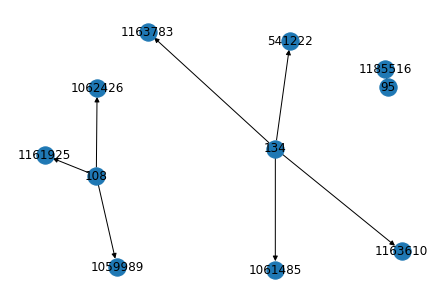

In [256]:
plt.clf()
nx.draw(g, with_labels = True)
plt.show()

In [255]:
small_ds

,source,dest
id,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222
1143,134,1061485
1146,134,1163610
1147,134,1163783


In [257]:
G = nx.convert_matrix.from_pandas_edgelist(graph_ds, 'source','dest', create_using=nx.DiGraph())

In [290]:
print()
print("Number of nodes:  %d\nNumber of edges: %d\n" % (G.number_of_nodes() , G.number_of_edges()))


Number of nodes:  98343
Number of edges: 483094



#### Compute the average number of links in an arbitrary page. 

- Do you believe that the graph is dense or sparse?

In [325]:
random_row = graph_ds.sample()
random_page_number = random_row['source'].values[0]
print(random_page_number)
random_row

1056902


,source,dest
id,,
15829827,1056902,1060279


In [330]:
#(number of out links + number of in links) divided by 2
print(graph_ds[graph_ds.source == random_page_number])
print(graph_ds[graph_ds.dest == random_page_number])
(len(graph_ds[graph_ds.source == random_page_number]) + len(graph_ds[graph_ds.dest == random_page_number])) / 2

           source     dest
id                        
15829825  1056902  1058405
15829826  1056902  1059231
15829827  1056902  1060279
15829828  1056902  1060412
15829829  1056902  1061375
           source     dest
id                        
15884685  1058405  1056902
15929819  1059231  1056902
16011740  1060412  1056902
16120366  1061375  1056902
18653570  1166252  1056902


5.0

#### What is the graph density? 

Given a graph G = (V,E) where E is the number of edges and V is the number of vertices, the graph density of a graphs is defined to be the ratio of the number of edges $|E|$ with respect to the maximum possible edges. For a directed graph the maximum possible edges is 2 times the number of possible pairs, in other words $2 \binom{V}{2} = |V| (|V|-1) $. The density is then $$ \frac{|E|} {|V| (|V|-1)} $$

In [345]:
nnodes = G.number_of_nodes() 
nedges = G.number_of_edges()
print('(density, number of nodes, number of edges)')
(nedges/(nnodes*(nnodes-1)), nnodes, nedges)

(density, number of nodes, number of edges)


(4.9951571365597335e-05, 98343, 483094)

#### The nodes' degree distribution

# [RQ2]

In [166]:
index_list = []
category_list = []
with open(path + file_page) as f:
    for line in f:
        try:
            index, category = line.rstrip().split(' ', 1)
            index_list.append(int(index))
            category_list.append(category)
        except:
            pass
page_df = pd.DataFrame({'id':index_list, 'category':category_list})
page_df.set_index('id', inplace = True)

In [175]:
page_df.head(2)

,category
id,
0,Chiasmal syndrome
1,Kleroterion
